# 분류 모델 실습

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('datas_ml/pima-indians-diabetes.csv')
df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 데이터 처리

In [5]:
df.columns

Index(['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

In [6]:
import numpy as np

In [7]:
df.loc[:, 'Plas':'mass'].replace(0, np.nan)

,Plas,Pres,skin,test,mass
0,148.0,72.0,35.0,NaN,33.6
1,85.0,66.0,29.0,NaN,26.6
2,183.0,64.0,NaN,NaN,23.3
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1
...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9
764,122.0,70.0,27.0,NaN,36.8
765,121.0,72.0,23.0,112.0,26.2
766,126.0,60.0,NaN,NaN,30.1


In [8]:
# df.loc[:, 'Plas':'mass'] = df.loc[:, 'Plas':'mass'].replace(0, np.nan)
cols = df.loc[:, 'Plas':'mass'].columns
df[cols] = df[cols].replace(0, np.nan)

In [9]:
df

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [10]:
df.isna().sum()

Preg       0
Plas       5
Pres      35
skin     227
test     374
mass      11
pedi       0
age        0
class      0
dtype: int64

In [11]:
df = df.dropna()

In [12]:
df = df.reset_index(drop=True)
df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
1,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
2,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
3,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
4,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    392 non-null    int64  
 1   Plas    392 non-null    float64
 2   Pres    392 non-null    float64
 3   skin    392 non-null    float64
 4   test    392 non-null    float64
 5   mass    392 non-null    float64
 6   pedi    392 non-null    float64
 7   age     392 non-null    int64  
 8   class   392 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 27.7 KB


In [14]:
df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### X, y 구분

In [16]:
df.columns

Index(['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

In [17]:
y = df['class']

In [18]:
X = df.drop('class', axis=1)

In [19]:
X.shape, y.shape

((392, 8), (392,))

### 피처 스케일링

In [20]:
y.value_counts()

class
0    262
1    130
Name: count, dtype: int64

In [21]:
import matplotlib.pyplot as plt
import seaborn as sb

<Axes: xlabel='class', ylabel='count'>

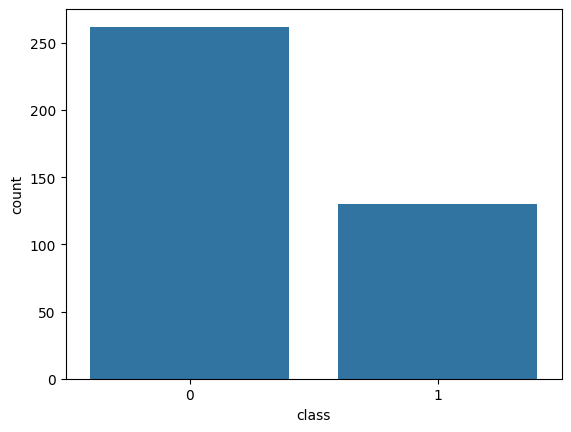

In [22]:
# y값의 비율 시각화
sb.countplot(data = df, x='class')

up sampling

In [23]:
from imblearn.over_sampling import SMOTE

In [24]:
sm = SMOTE(random_state= 99 )

In [25]:
X.shape

(392, 8)

In [26]:
y.shape

(392,)

In [27]:
# 주족한 데이터는 up sampling 함
X, y = sm.fit_resample(X, y)

In [28]:
X.shape, y.shape

((524, 8), (524,))

In [29]:
y.value_counts()

class
0    262
1    262
Name: count, dtype: int64

## Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [31]:
X_scaler = StandardScaler()

In [32]:
X_scaled = X_scaler.fit_transform(X)

In [33]:
X_scaled

array([[-0.78239954, -1.25665137, -0.45820327, ..., -0.82256902,
        -1.12339601, -1.07958082],
       [-1.08451993,  0.25718318, -2.55790992, ...,  1.3995335 ,
         5.23265274,  0.07805973],
       [-0.17815878, -1.60357179, -1.75033044, ..., -0.39296253,
        -0.88066147, -0.59723059],
       ...,
       [ 1.03032276,  1.87689512, -0.19926717, ...,  0.59510897,
        -0.70407228,  1.04276019],
       [-0.78239954,  1.22029332,  0.15890199, ..., -1.43516324,
        -0.30741692,  0.07805973],
       [ 1.03032276,  0.47912171, -0.06265938, ...,  0.20129853,
        -0.61321706,  1.04276019]], shape=(524, 8))

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=99)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
classifier = LogisticRegression()

In [38]:
classifier.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [39]:
y_pred = classifier.predict(X_test)

In [40]:
y_pred

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1])

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [42]:
cm = confusion_matrix(y_test, y_pred)

In [43]:
cm

array([[41, 10],
       [12, 42]])

In [44]:
from sklearn.metrics import classification_report, accuracy_score

# y_test: 실제 라벨, y_pred: 모델 예측 라벨
print("정확도:", accuracy_score(y_test, y_pred))
print("\n[정밀도, 재현율, F1-score 요약 보고서]")
print(classification_report(y_test, y_pred))

정확도: 0.7904761904761904

[정밀도, 재현율, F1-score 요약 보고서]
              precision    recall  f1-score   support

           0       0.77      0.80      0.79        51
           1       0.81      0.78      0.79        54

    accuracy                           0.79       105
   macro avg       0.79      0.79      0.79       105
weighted avg       0.79      0.79      0.79       105



## 모델 일반화

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
model_lr = LinearRegression()

In [53]:
model_lr

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [55]:
model_lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [57]:
model_lr.intercept_

np.float64(0.49824448632093904)

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [61]:
model_lr = LinearRegression()
model_lr.fit(x_train_scaled, y_train)

y_pred = model_lr.predict(x_test_scaled)

y_pred

array([ 5.13024898e-02,  6.37908352e-01,  5.22740806e-01,  6.09780511e-01,
        1.21826768e+00,  3.87642692e-01,  3.38889709e-01,  6.76435360e-01,
        9.96683487e-01,  4.81263648e-01,  5.16691614e-01,  2.62486211e-01,
        4.42431739e-01,  7.04878335e-01,  6.38245535e-01,  7.66321289e-01,
        1.54341738e-01,  1.05346274e-01,  5.11851946e-01,  4.00274110e-01,
        8.43398203e-01,  2.63087996e-01,  5.18380989e-01,  7.07976304e-02,
        3.00222537e-01,  8.05610296e-01,  9.11569309e-01,  3.23740496e-01,
        4.90904639e-01,  8.42835433e-02,  5.90493634e-01,  5.02178502e-01,
        6.33987672e-01,  4.84487473e-01,  5.40325644e-01,  3.73702744e-01,
        7.61265836e-01,  2.80380784e-01,  5.24077110e-01,  7.45233812e-01,
        4.02695788e-01,  7.36174005e-01,  1.16321486e-01,  6.69036278e-01,
        8.88345700e-01,  7.84464762e-01,  3.41202882e-01,  6.57777087e-01,
        1.38109052e-01,  4.73120209e-01,  7.31454202e-02,  3.49590703e-01,
        1.37595787e-01,  

In [56]:
model_lr.coef_

array([ 0.02558148,  0.23788338, -0.00425117,  0.02929956, -0.02545248,
        0.04194646,  0.05969506,  0.07261609])

In [75]:
my_data = [[
    2,     # Preg
    120,   # Plas
    70,    # Pres
    25,    # skin
    80,    # test
    28.5,  # mass
    0.5,   # pedi
    30     # age
]]



In [76]:
my_data_scaled = X_scaler.transform(my_data)

c:\Users\Admin\miniconda3\envs\eda_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [77]:
classifier.predict(my_data_scaled)

array([0])

## 모델 저장하기
- 이유: 서빙한다(서비스 만들기 위해)

In [46]:
import joblib

In [ ]:
import os
os.makedirs('models',exist_ok=True)
joblib.dump(classifier,'models/classifier.pkl')

['models/classifier.pkl']

In [80]:
ai = joblib.load('models/classifier.pkl')
ai.predict(my_data_scaled)

array([0])